In [62]:
import os
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [63]:
def load_top_results_per_algo(folder_path, sort_by="test", top_n=10):
    """
    Load all result CSV files from a folder and return the top-N performing results per algorithm.

    Parameters:
        folder_path (str): Path to the folder containing result CSV files.
        sort_by (str): Column name to sort by (default: 'test').
        top_n (int): Number of top rows to return per algorithm (default: 10).

    Returns:
        pd.DataFrame: Top-N rows per algorithm, sorted by `sort_by` metric.
    """
    all_results = []

    for file in os.listdir(folder_path):
        if file.endswith(".csv"):
            file_path = os.path.join(folder_path, file)
            df = pd.read_csv(file_path)

            # Parse theta column if present
            for col in df.columns:
                if "theta" in col and "parsed" not in col:
                    df["theta_parsed"] = df[col].apply(ast.literal_eval)
                    break

            all_results.append(df)

    if not all_results:
        raise ValueError("No CSV files found in the specified folder.")

    full_df = pd.concat(all_results, ignore_index=True)

    # Top-N results per algorithm
    top_per_alg = (
        full_df.sort_values(by=sort_by, ascending=True)  # lower is better if it's loss
        .groupby("alg")
        .head(top_n)
        .reset_index(drop=True)
    )

    return top_per_alg


In [64]:
best_df = load_top_results_per_algo("./results", sort_by="test")
print(best_df[["alg", "train", "test", "theta_parsed"]])

    alg         train         test  \
0   ABC -40136.510610 -5940.285594   
1   ABC -25104.120112 -5900.464486   
2   ABC -34149.343249 -5765.239703   
3   ABC -34149.343249 -5765.239703   
4   ABC -35375.026923 -5762.414827   
5   CAB -23538.806160 -5750.800950   
6   ABC -22347.215087 -5733.682818   
7   ABC -24046.041796 -5603.628820   
8   CAB -23310.970499 -5564.758082   
9   ABC -33559.295594 -5433.134404   
10  ABC -36699.370779 -5391.748026   
11  ABC -30868.686512 -5356.834249   
12  GWO -53078.161568 -5091.870931   
13  CAB -34948.990879 -5037.977844   
14  GWO -53074.420046 -5013.413326   
15  CAB -12328.982637 -5011.041410   
16  GWO -53000.593688 -4992.567190   
17  GWO -54791.822855 -4966.415417   
18  GWO -67636.182037 -4884.966194   
19  GWO -67636.182037 -4884.966194   
20  GWO -67636.182037 -4884.966194   
21  GWO -67636.182037 -4884.966194   
22  GWO -67636.182037 -4884.966194   
23  GWO -67636.182037 -4884.966194   
24  CAB -11618.023541 -4457.823312   
25  CAB -102

In [65]:
best_df

,alg,seed,train,test,"theta [d1, t1, a1, d2, t2, a2, shift]",pop_size,gens,time(seconds),theta_parsed
0,ABC,36,-40136.510610,-5940.285594,"[5.0, 2.168559149829096, 0.11345454213080611, ...",60,100,24.27,"[5.0, 2.168559149829096, 0.11345454213080611, ..."
1,ABC,36,-25104.120112,-5900.464486,"[5.0, 1.1076393868511358, 0.36829097622497386,...",30,100,13.59,"[5.0, 1.1076393868511358, 0.36829097622497386,..."
2,ABC,40,-34149.343249,-5765.239703,"[5.0, 1.4399796875026858, 0.2689603612688621, ...",30,100,13.61,"[5.0, 1.4399796875026858, 0.2689603612688621, ..."
3,ABC,4,-34149.343249,-5765.239703,"[5.4336286319503, 0.923418758340628, 0.4676696...",20,100,7.72,"[5.4336286319503, 0.923418758340628, 0.4676696..."
4,ABC,11,-35375.026923,-5762.414827,"[5.0, 2.135348770850568, 0.09329396158618825, ...",60,100,23.56,"[5.0, 2.135348770850568, 0.09329396158618825, ..."
5,CAB,28,-23538.806160,-5750.800950,"[7.7419530960169896, 2.1420206109238786, 0.483...",20,100,2.82,"[7.7419530960169896, 2.1420206109238786, 0.483..."
6,ABC,29,-22347.215087,-5733.682818,"[5.0, 1.5312905040998863, 0.29899260566344166,...",20,100,7.75,"[5.0, 1.5312905040998863, 0.29899260566344166,..."
7,ABC,52,-24046.041796,-5603.628820,"[5.425584640864012, 0.9131731049113578, 0.3441...",20,100,9.66,"[5.425584640864012, 0.9131731049113578, 0.3441..."
8,CAB,28,-23310.970499,-5564.758082,"[8.189350257728469, 2.1058934622394228, 0.4852...",30,100,4.87,"[8.189350257728469, 2.1058934622394228, 0.4852..."
9,ABC,22,-33559.295594,-5433.134404,"[5.0, 1.6084935297202905, 0.18189253018174087,...",20,100,7.60,"[5.0, 1.6084935297202905, 0.18189253018174087,..."


In [66]:
def plot_top_algo_comparison(top_df, metric="test"):
    """
    Visualize the top N results for each algorithm using a boxplot and stripplot.

    Parameters:
        top_df (pd.DataFrame): DataFrame of top-N results per algorithm.
        metric (str): Metric column to visualize (default: 'test').
    """
    if metric not in top_df.columns:
        raise ValueError(f"Metric '{metric}' not found in DataFrame.")

    plt.figure(figsize=(10, 6))
    sns.boxplot(x="alg", y=metric, data=top_df, palette="Set2", showfliers=False)
    sns.stripplot(x="alg", y=metric, data=top_df, color="black", size=5, jitter=True, alpha=0.7)

    plt.title(f"Top 10 {metric.capitalize()} Scores per Algorithm")
    plt.ylabel(f"{metric.capitalize()} Score")
    plt.xlabel("Algorithm")
    plt.grid(True, axis="y", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

/var/folders/rv/x7cnkh7d7sj0py4d4bp9vbbw0000gn/T/ipykernel_84087/3406874041.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="alg", y=metric, data=top_df, palette="Set2", showfliers=False)


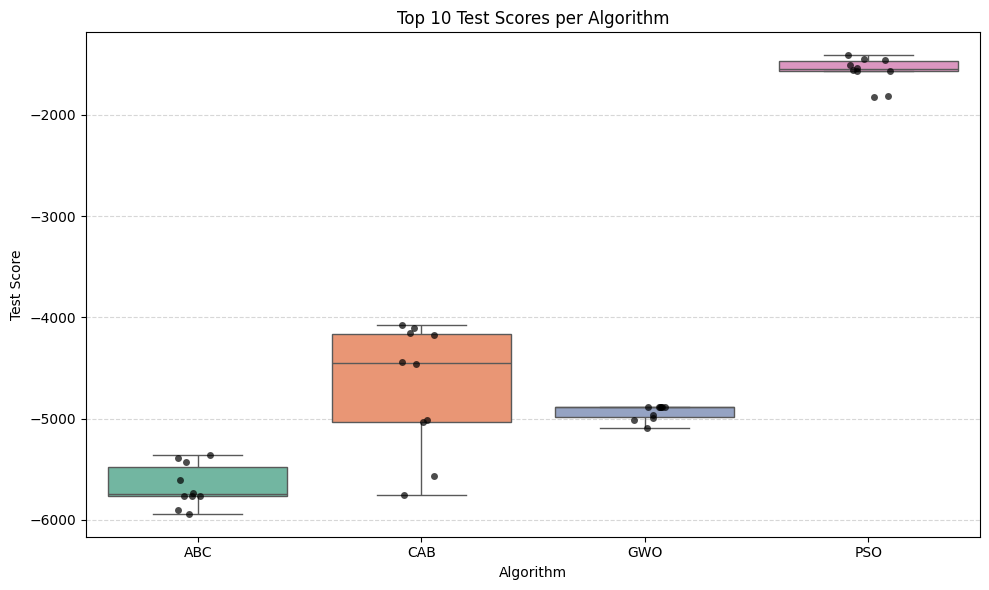

In [67]:
plot_top_algo_comparison(best_df, metric="test")

In [68]:
def plot_best_pop_and_gens(best_df):
    """
    Plot the best population size and generation count for each algorithm.

    Parameters:
        best_df (pd.DataFrame): Output from summarise_best_hyperparams_per_algo().
                                Must contain columns: 'alg', 'pop_size', 'gens'
    """
    if not {"alg", "pop_size", "gens"}.issubset(best_df.columns):
        raise ValueError("DataFrame must contain 'alg', 'pop_size', and 'gens' columns.")

    plt.figure(figsize=(10, 6))
    ax = sns.scatterplot(
        data=best_df,
        x="gens",
        y="pop_size",
        hue="alg",
        style="alg",
        s=150,
        palette="tab10"
    )

    for _, row in best_df.iterrows():
        plt.text(row["gens"] + 0.5, row["pop_size"] + 0.5, row["alg"], fontsize=10)

    plt.title("Best Population Size vs Generation Count per Algorithm")
    plt.xlabel("Number of Generations")
    plt.ylabel("Population Size")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.legend(title="Algorithm")
    plt.tight_layout()
    plt.show()
    

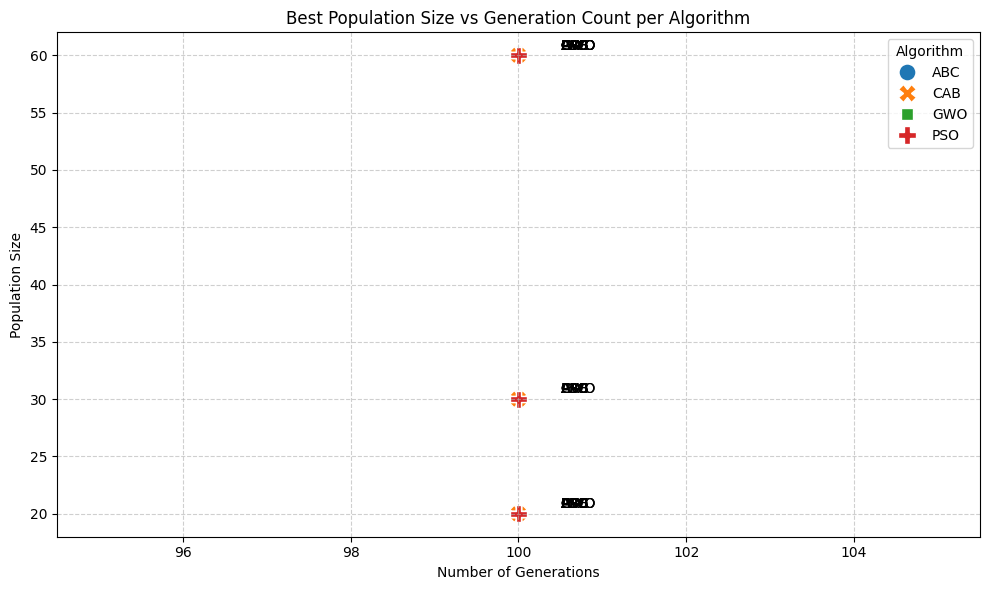

In [69]:
plot_best_pop_and_gens(best_df)

In [76]:
gwo_only = best_df[best_df["alg"] == "GWO"]
cab_only = best_df[best_df["alg"] == "CAB"]
abc_only = best_df[best_df["alg"] == "ABC"]
pso_only = best_df[best_df["alg"] == "PSO"]

In [78]:
print(gwo_only)

    alg  seed         train         test  \
12  GWO     8 -53078.161568 -5091.870931   
14  GWO    27 -53074.420046 -5013.413326   
16  GWO     0 -53000.593688 -4992.567190   
17  GWO    28 -54791.822855 -4966.415417   
18  GWO     2 -67636.182037 -4884.966194   
19  GWO    58 -67636.182037 -4884.966194   
20  GWO    46 -67636.182037 -4884.966194   
21  GWO     3 -67636.182037 -4884.966194   
22  GWO    49 -67636.182037 -4884.966194   
23  GWO    31 -67636.182037 -4884.966194   

               theta [d1, t1, a1,  d2, t2, a2, shift]  pop_size  gens  \
12  [5.3950750566017325, 2.2523200817169626, 0.074...        30   100   
14  [5.06195103399332, 1.8519091847482019, 0.07548...        20   100   
16  [5.0, 1.7977122543322315, 0.07709937022310946,...        20   100   
17  [5.300132824829003, 0.4515030389473222, 0.0959...        30   100   
18  [5.312302647382065, 2.455233030709875, 0.05328...        60   100   
19  [5.2617876015686065, 1.9301583802342464, 0.050...        60   100   
20  

In [74]:
def plot_theta_distribution(df, theta_col="theta_parsed", alg_filter=None):
    """
    Plot distribution of each theta parameter in a DataFrame, rounding integer-like parameters.

    Parameters:
        df (pd.DataFrame): DataFrame with a theta_parsed column (list of floats).
        theta_col (str): Name of the column with parsed theta lists.
        alg_filter (str or list, optional): Filter to specific algorithms if provided.
    """
    if alg_filter is not None:
        df = df[df["alg"].isin([alg_filter] if isinstance(alg_filter, str) else alg_filter)]

    theta_labels = [
        "d1 (fast window)",
        "t1 (fast type)",
        "α1 (fast alpha)",
        "d2 (slow window)",
        "t2 (slow type)",
        "α2 (slow alpha)",
        "buy_delay",
        "sell_delay"
    ]

    theta_matrix = np.vstack(df[theta_col].values)
    n_params = theta_matrix.shape[1]

    # Apply rounding to integer-like dimensions
    rounded = theta_matrix.copy()
    round_indices = [0, 1, 3, 4, 6, 7]  # indices of int-based parameters
    rounded[:, round_indices] = np.round(rounded[:, round_indices])

    fig, axes = plt.subplots(nrows=(n_params + 2) // 3, ncols=3, figsize=(15, 4 * ((n_params + 2) // 3)))
    axes = axes.flatten()

    for i in range(n_params):
        label = theta_labels[i] if i < len(theta_labels) else f"Theta[{i}]"
        sns.histplot(rounded[:, i], bins=20, ax=axes[i], kde=True, color="skyblue", edgecolor="black")
        axes[i].set_title(f"{label} Distribution")
        axes[i].set_xlabel(label)
        axes[i].set_ylabel("Count")

    for j in range(i + 1, len(axes)):
        axes[j].axis("off")

    plt.suptitle("Theta Parameter Distributions", fontsize=16)
    plt.tight_layout()
    plt.show()


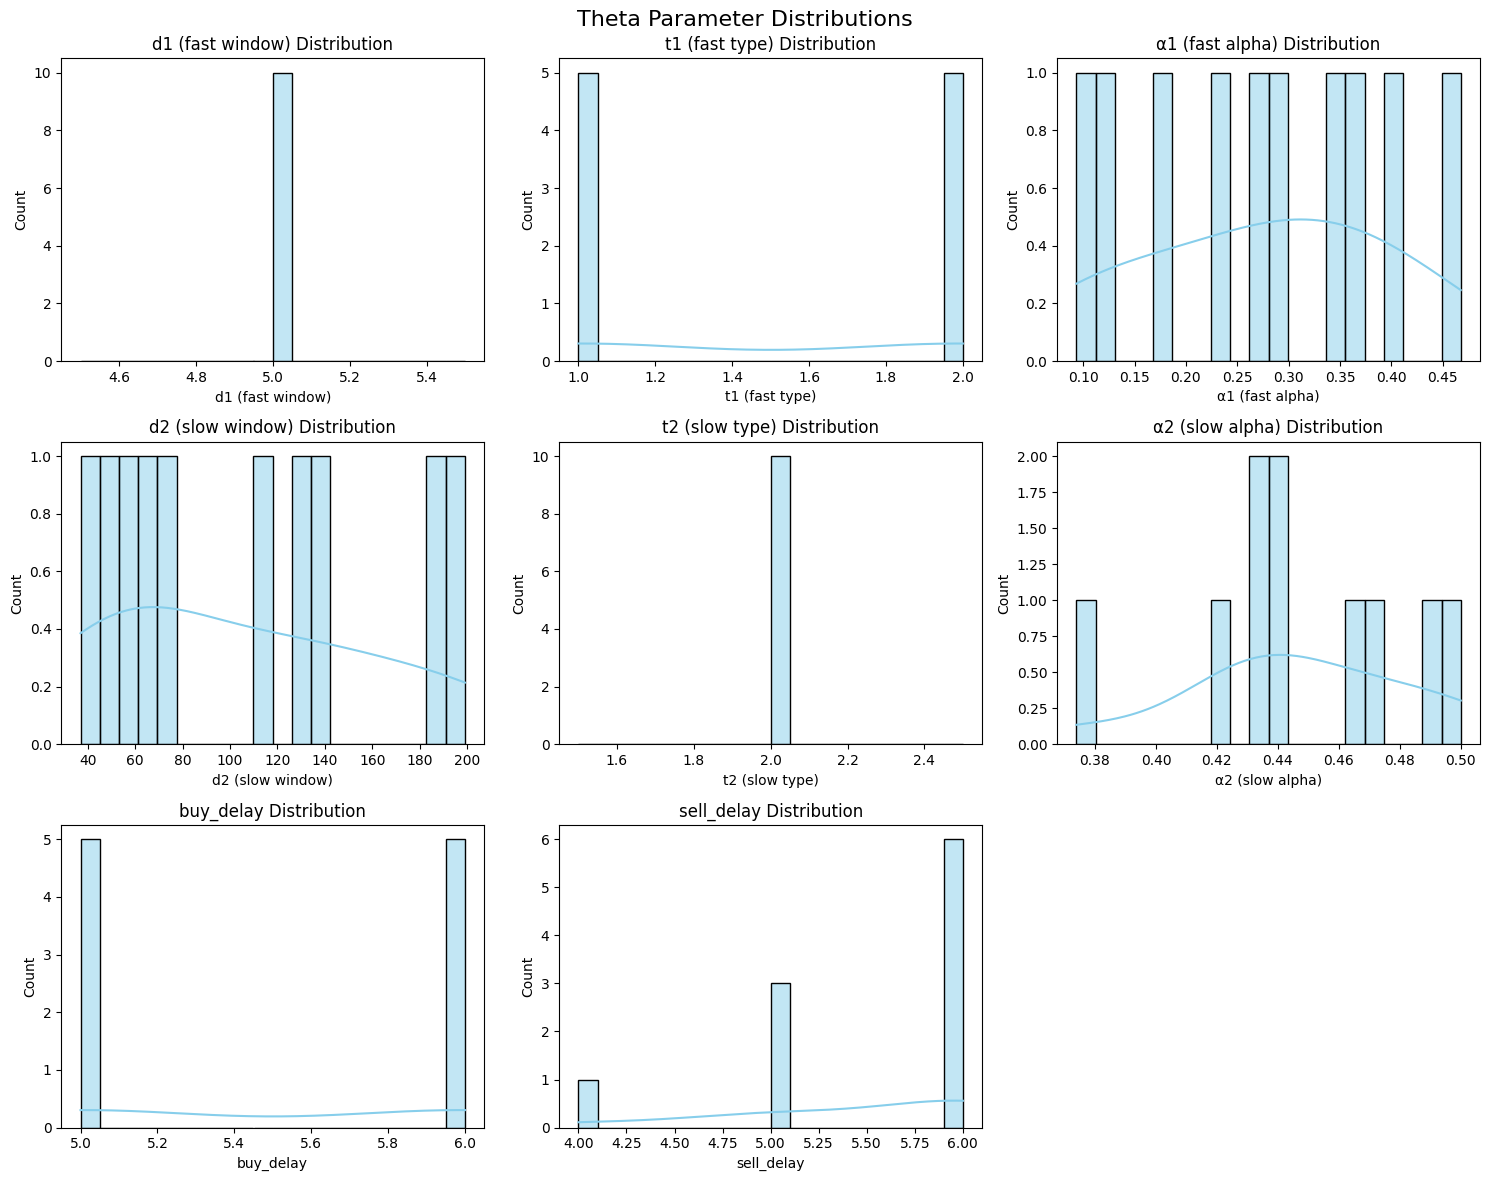

In [75]:
plot_theta_distribution(best_df, alg_filter="ABC")